In [1]:
from simulation import (
    HistoricalACWIIMIReturns,
    Historical1YearUSBondYields,
    HistoricalGermanInflation,

    MonteCarloSimulation,
    ResultPlotter
)

[Taichi] version 1.6.0, llvm 15.0.4, commit f1c6fbbd, linux, python 3.11.6


[I 11/30/23 18:36:57.939 30682] [shell.py:_shell_pop_print@23] Graphical python shell detected, using wrapped sys.stdout


In [2]:
NUM_SIMULATIONS = 1_000_000
CAPITAL_GAINS_TAX_RATE = 0.278186
ETF_TAX_EXEMPTION = 0.3

In [3]:
sim = MonteCarloSimulation(
    num_sim=NUM_SIMULATIONS,
    capital_gains_tax_rate=CAPITAL_GAINS_TAX_RATE,
    investment_tax_exemption=ETF_TAX_EXEMPTION,
    investment_return_gen=HistoricalACWIIMIReturns(),
    safe_deposit_rate_gen=Historical1YearUSBondYields(),
    inflation_rate_gen=HistoricalGermanInflation()
)

HistoricalACWIIMIReturns
  Annualized increase:    6.3%
  Annualized volatility: 15.3%

Historical1YearUSBondYields
  Annualized increase:    4.9%
  Annualized volatility:  0.9%

HistoricalGermanInflation
  Annualized increase:    2.7%
  Annualized volatility:  1.0%

[Taichi] Starting on arch=cuda


Investment horizon:            20 years
Currently invested:            100,000
Currently risk free deposited: 0
Monthly invested:              2,000
Monthly risk free deposited:   0


,Resulting Wealth
Percentiles,
0.01,"255,067.20"
0.05,"344,995.33"
0.10,"397,342.79"
0.25,"509,947.03"
0.50,"686,886.69"
0.75,"943,573.67"
0.90,"1,274,438.32"


Average resulting wealth:                   780,230
Average resulting wealth only safe deposit: 542,539
Fraction of Worse Outcomes compared to not investing: 29.7%
Conditional mean loss: -116634.9


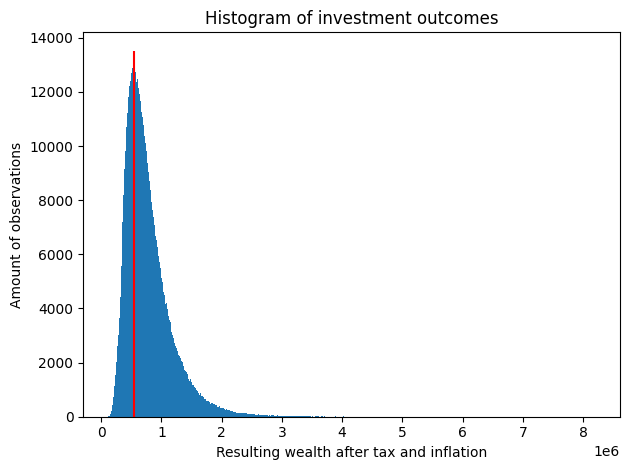

In [4]:
sim_result = sim(
    num_years=20,
    current_invest=100_000,
    current_save=0,
    monthly_invest=2_000,
    monthly_save=0
)
plotter = ResultPlotter(sim_result)
plotter.print_result()